# <center> Using Deep Learning for Image Recognition: Building Deep Neural Network Models to Predict Handwritten Digits </center>

![neuron image](https://images.unsplash.com/photo-1542382257-80dedb725088?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=928&q=80)
<center> Photo by Nastya Dulhiier on Unsplash </center>

*Author: David Rodrigues* | https://github.com/davidrodriguessp | https://www.linkedin.com/in/davidrodrigues/ | davidrodriguessp@hotmail.com <br>

In this project, we created different models to predict handwritten digits. We used a dataset available in the Scikit-learn Python library called `load_digits()`. The dataset has 1,797 images. Initially, we created a model using the K-nearest neighbors algorithm. Then, we built different models using Artificial Neural Networks.

The conclusion was that the different models reached similar scores, but K-nearest Neighbors (KNN) with k=1 had a slightly better performance, reaching 99% accuracy.

## Reading and Exploring the Dataset

In [1]:
# Import the libraries we will use on the project
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
%matplotlib inline

# Load the load_digits dataset
digits = load_digits()

# Create the features and target datasets
features = pd.DataFrame(digits['data'])
target = pd.Series(digits['target'])

# Print the number of rows and columns in the dataset
print(features.shape)

# Display the first row of data
features.head(1)

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


As we see above, each row represents the image of one handwritten digit. The images have 8 x 8 pixels, each one represented by 64 columns of data. The `target` Series shows the actual digit represented by the image.

Below we display some of the images.

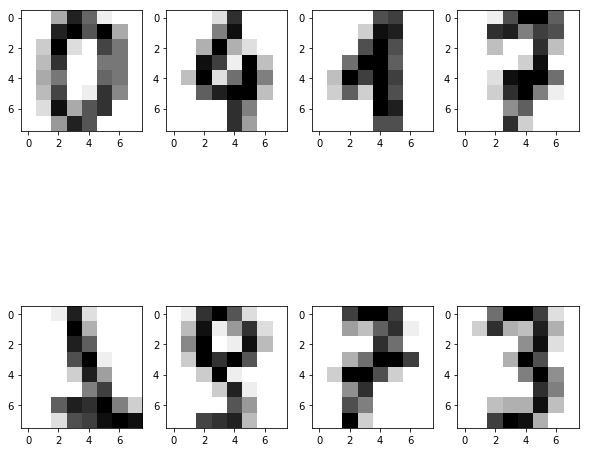

In [2]:
# Visualize some of the images that are part of the dataset
images = [0, 100, 200, 300, 1000, 1100, 1200, 1300]

counter = 1 # Initialize counter as 1
plt.figure(figsize=(10,10)) # Create the figure
for i in images:
    im = features.iloc[i]
    im = im.values.reshape(8,8)
    plt.subplot(2,4,counter)
    plt.imshow(im, cmap='gray_r')
    counter+=1  
plt.show()    

### Spliting the Data in Train and Test Sets

In [3]:
# Split the data into train and test sets. Test set will have 30% of the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, shuffle=True)

## K-Nearest Neighbors Models

In [4]:
# Write a function to train a k-nearest neighbors model
def train(X, y, k):
    '''Define a function to train a K-nearest neighbors classifier'''
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    return knn

In [5]:
# Write a function to test the model
def test(knn, X, y):
    '''Define a function to test the K-nearest neighbors classifier'''
    accuracy = knn.score(X, y)
    return accuracy

In [6]:
# Write a function to cross-validate with 5-fold cross validation
def cross_validate(k):
    '''Define a function to cross-validate the K-nearest neighbors classifier with 5-folds'''
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(knn, features, target, cv=kf, scoring='accuracy')
    score = np.mean(score)
    return score   

### Hyperparameter Tuning

In [7]:
# Train and test models with k neighbors varying from 1 to 10
k_values = list(range(1,11))
different_scores = []
for v in k_values:
    model = train(X_train, y_train, v)
    accuracy = test(model, X_test, y_test)
    different_scores.append(accuracy)

In [8]:
# Print the scores using k with values from 3 to 10
print(np.round(different_scores, 2))

[0.98 0.98 0.99 0.99 0.99 0.99 0.99 0.99 0.98 0.98]


In [9]:
# Train and test models with KNN (k) variying from 1 to 10 using 5-fold cross validation
k_values = list(range(1,11))
cvs = []
for i in k_values:
    model =  KNeighborsClassifier(n_neighbors=i)
    score = cross_validate(i)
    cvs.append(score)

In [10]:
# Print the 5-fold cross validated scores with k varying for 1 to 10
cvs = np.round(cvs, 3)
print(cvs)

[0.988 0.984 0.987 0.982 0.986 0.985 0.986 0.983 0.982 0.982]


### Visualize KNN Score for Different K Values

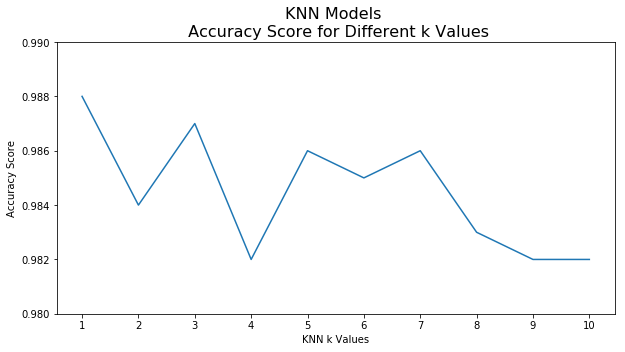

In [11]:
plt.figure(figsize=(10,5))
plt.plot(k_values, cvs)
plt.xlabel('KNN k Values')
plt.ylabel('Accuracy Score')
plt.title('KNN Models \n Accuracy Score for Different k Values', fontsize=16)
plt.xticks(list(range(1,11)))
plt.ylim(0.98, 0.99)
plt.show()

With KNN, we obtained 99% of accuracy when k=1. Let's build models with Artificial Neural Networks and compare the accuracy.

## Artificial Neural Networks

### Model with One Hidden Layer

In [12]:
# Create a function to cross-validate the model with different number of neurons
def cross_validate_one_layer(neurons):
    '''Train a model with 1 hidden layer, perform 5-fold cross-validation and return the mean score'''
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    ann = MLPClassifier(hidden_layer_sizes=(neurons), random_state=42, max_iter=2000)
    scores = cross_val_score(ann, features, target, cv=kf)
    score = np.mean(scores)
    return score 

In [13]:
# Loop through a list of different number of neurons - num_neurons, apply cross validation, create a list of scores
num_neurons = [8,16,32, 64,128,256] # list with different number of neurons
output_scores = [] # new list to add the scores
for i in num_neurons:
    scores = cross_validate_one_layer(i)
    scores_mean = np.mean(scores)
    scores_mean = np.round(scores_mean, 3)
    output_scores.append(scores_mean)
    
print(output_scores)

[0.937, 0.955, 0.967, 0.967, 0.973, 0.977]


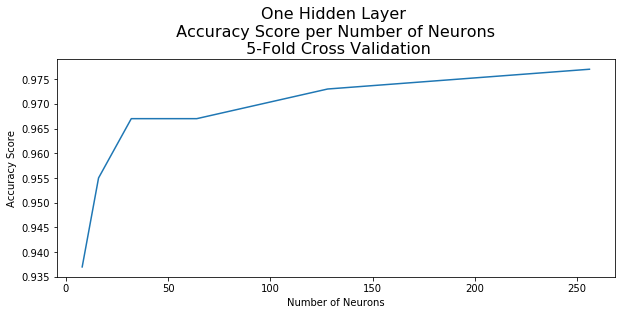

In [14]:
# Display a figure with the accuracy for different number of neurons in the hidden layer
plt.figure(figsize=(10,4))
plt.plot(num_neurons, output_scores)
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy Score')
plt.title('One Hidden Layer \n Accuracy Score per Number of Neurons \n 5-Fold Cross Validation', fontsize=16)
plt.show()

As displayed above, the Neural Network model with one layer didn't manage to improve the accuracy observed with the KNN algorithm. The accuracy reached was 98%.

### Model with Two Hidden Layers

In [15]:
# Create a function to train and validate a model with 2 hidden layers
def cross_validate_two_layers(neur):
    '''Train a model with 2 layers, perform 5-fold cross-validation and return the mean score'''
    nn = MLPClassifier(random_state=42, hidden_layer_sizes=(neur, neur), max_iter=2000)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(nn, features, target, cv=kf)
    score = np.mean(scores)
    return score

In [16]:
# Train and cross-validate models with different number of neurons per each of the two layers
# Each of the two layers will have the same number of neurons
num_neurons = [8,16,32, 64,128,256] 
results_two = []
for n in num_neurons:
    scores = cross_validate_two_layers(n)
    score = np.mean(scores)
    score = np.round(score, 3)
    results_two.append(score)
print(results_two)

[0.936, 0.949, 0.964, 0.972, 0.978, 0.982]


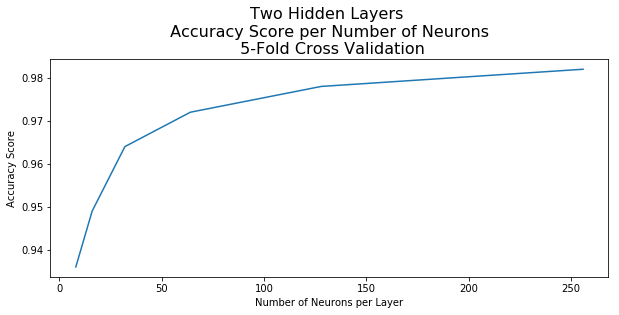

In [17]:
# Display a plot with the accuracy reached with the two layers with different number of neurons per layer
plt.figure(figsize=(10,4))
plt.plot(num_neurons, results_two)
plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Accuracy Score')
plt.title('Two Hidden Layers \n Accuracy Score per Number of Neurons \n 5-Fold Cross Validation', fontsize=16)
plt.show()

Results with models with two layers were similar to the scores reached with one layer.

### Model with Three Hidden Layers

In [18]:
# Create a function to train and validate a model with 3 hidden layers
def cross_validate_three_layers(neur):
    '''Train a model with 3 layers, perform 5-fold cross-validation and return the mean score'''
    nn = MLPClassifier(random_state=42, hidden_layer_sizes=(neur, neur, neur), max_iter=2000)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(nn, features, target, cv=kf)
    score = np.mean(scores)
    return score

In [19]:
# Train and cross-validate models with different number of neurons per each of the three layers
# Each of the three layers will have the same number of neurons
num_neurons = [8,16,32, 64,128,256] 
results = []
for n in num_neurons:
    scores = cross_validate_three_layers(n)
    score = np.mean(scores)
    score = np.round(score, 3)
    results.append(score)
print(results)

[0.916, 0.952, 0.965, 0.974, 0.981, 0.981]


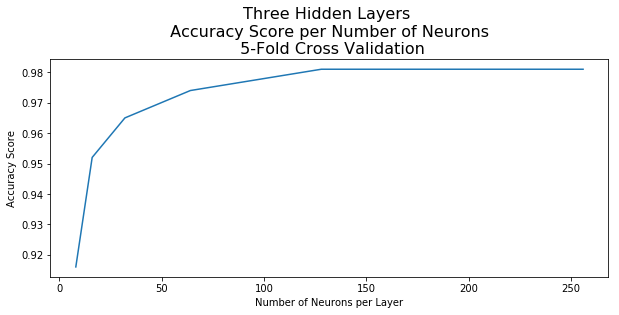

In [20]:
# Display a plot with the accuracy reached with the three layers with different number of neurons in each
plt.figure(figsize=(10,4))
plt.plot(num_neurons, results)
plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Accuracy Score')
plt.title('Three Hidden Layers \n Accuracy Score per Number of Neurons \n 5-Fold Cross Validation', fontsize=16)
plt.show()

# Conclusion

The objective of this project was to build a model to predict handwritten digits based on images. The data used was the `load_digits` dataset available in the `sklearn.datasets` library. We tested models with K-nearest Neighbors and Artificial Neural Networks using the MLP Classifier with one, two and three hidden layers.

Five-fold Cross validation was used to test all models to verify how the models would probably behave with new data.

At the end, the different models reached similar scores, but K-nearest Neighbors (KNN) with k=1 had a slightly better performance, reaching 99% accuracy.

---

*Author: David Rodrigues* | https://github.com/davidrodriguessp | https://www.linkedin.com/in/davidrodrigues/ | davidrodriguessp@hotmail.com <br>